In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
import os
%matplotlib inline

from IPython.display import display, HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [2]:
working_dir = r'../../../outputs/agg'
pd.options.display.float_format = '{:0,.0f}'.format
format_percent = "{:,.2%}".format

In [3]:
def load_data(fname):
    """ open and join model and survey data """

    df_model = pd.read_csv(os.path.join(working_dir,fname+'.csv'))
    df_model['source'] = 'model'
    df_survey = pd.read_csv(os.path.join(working_dir,'survey',fname+'.csv'))
    df_survey['source'] = 'survey'
    df = df_model.append(df_survey)

    return df

# Total Persons

In [4]:
df = load_data('person_type')
df.groupby('source').sum()[['psexpfac']].T

source,model,survey
psexpfac,"4,059,045","3,872,368"


# Total Households

In [5]:
df = load_data('household_size_vehs_workers')
df.groupby('source').sum()[['hhexpfac']].T

source,model,survey
hhexpfac,"1,612,728","1,656,146"


# Total Trips

In [6]:
df = load_data('trip_purpose_mode')
df.groupby('source').sum()[['trexpfac']].T

source,model,survey
trexpfac,"16,083,058","14,717,576"


# Total Tours

In [7]:
df = load_data('tour_purpose_mode')
df.groupby('source').sum()[['toexpfac']].T

source,model,survey
toexpfac,"6,358,329","6,593,850"


## Average Household Size

In [8]:
pd.options.display.float_format = '{:0,.2f}'.format
df = load_data('household_size_vehs_workers')
pd.DataFrame(
    df.groupby('source').apply(
        lambda row: ((row['hhsize']*1.0*row['hhexpfac']*1.0).sum())/row['hhexpfac'].sum()*1.0),
        columns=['avg_hh_size'])

,avg_hh_size
source,
model,2.52
survey,2.45


## Average Trips per Person

## Average Distance to Work

In [9]:
df = load_data('trip_averages')
df[df['dpurp'] == 'Work'].groupby(['mode','source']).mean()

travdist  travtime  travcost
mode       source                              
Bike       model       4.92     32.68      0.00
           survey     -1.00     -1.00     -1.00
HOV2       model       8.90     20.00      1.90
           survey     -1.00     -1.00     -1.00
HOV3+      model       9.25     20.46      1.98
           survey     -1.00     -1.00     -1.00
Other      survey     -1.00     -1.00     -1.00
SOV        model       9.06     20.54      1.88
           survey     -1.00     -1.00     -1.00
School Bus model       3.45     10.88      0.69
           survey     -1.00     -1.00     -1.00
Transit    model       9.96     39.98      1.28
           survey     -1.00     -1.00     -1.00
Walk       model       0.92     18.40      0.00
           survey     -1.00     -1.00     -1.00

## Average Distance to School

In [10]:
df[df['dpurp'] == 'School'].groupby(['mode','source']).mean()

travdist  travtime  travcost
mode       source                              
Bike       model       2.68     17.78      0.00
           survey     -1.00     -1.00     -1.00
HOV2       model       3.11      9.98      0.63
           survey     -1.00     -1.00     -1.00
HOV3+      model       3.20     10.15      0.65
           survey     -1.00     -1.00     -1.00
Other      survey     -1.00     -1.00     -1.00
SOV        model       6.09     15.58      1.28
           survey     -1.00     -1.00     -1.00
School Bus model       2.90      9.64      0.58
           survey     -1.00     -1.00     -1.00
Transit    model       5.77     35.56      0.33
           survey     -1.00     -1.00     -1.00
Walk       model       1.22     24.48      0.00
           survey     -1.00     -1.00     -1.00

## Transit Pass Ownership

In [11]:
pd.options.display.float_format = '{:0,.0f}'.format
df = load_data('parking_transit_pass')
pd.pivot_table(df, index='ptpass',columns='source',values='psexpfac',aggfunc='sum')

source,model,survey
ptpass,,
0,"3,326,352","3,105,112"
1,"732,693","767,256"


In [12]:
pd.pivot_table(df[df['ptpass']==1], 
               index='pptyp',columns='source',values='psexpfac',aggfunc='sum')

source,model,survey
pptyp,,
Child Age 5-15,"2,080","9,780"
Full-Time Worker,"460,552","690,356"
High School Student Age 16+,"105,546","4,345"
Non-Working Adult Age 65+,456,670
Non-Working Adult Age <65,"19,454",nan
Part-Time Worker,"54,763","45,264"
University Student,"89,842","16,841"


# Auto Ownership
## By Income

In [13]:
df = load_data('auto_ownership')
taz_geog = pd.read_sql_table('taz_geography', 
                             'sqlite:///../../../inputs/db/soundcast_inputs.db') 
df = df.merge(taz_geog, left_on='hhtaz', right_on='taz')

# Define income groups
inc_bin=[-1,20000,40000,60000,75000,9999999999999]
inc_bin_labels = ['0-$20k','$20-40k','$40-60k','$60-75k','>$75k']
df['income_bin'] = pd.cut(df['hhincome_thousands'], bins=inc_bin, labels=inc_bin_labels)

df.loc[df['hhvehs'] >= 4, 'hhvehs'] = '4+'

pd.pivot_table(df, index=['hhvehs','source'], columns='income_bin', values='hhexpfac', aggfunc='sum')

income_bin     0-$20k  $20-40k  $40-60k  $60-75k   >$75k
hhvehs source                                           
0      model   60,423   30,536   18,059    6,206  13,372
       survey  56,536   13,995   16,304   16,934  17,056
1      model  107,209  121,565   98,905   51,170 130,851
       survey  91,065   33,867   66,675  115,142 157,627
2      model   30,453   74,681   93,624   69,436 333,818
       survey  16,492   31,951   52,086   70,978 379,869
3      model    6,985   19,238   31,060   27,826 173,617
       survey   3,107    9,290    9,558   23,902 168,630
4+     model    2,726    7,404   11,084   10,301  82,179
       survey     639      371      379   13,961  96,984

In [14]:
pd.options.display.float_format = "{:,.2%}".format
_df_model = pd.pivot_table(df[df['source'] == 'model'], index='hhvehs', columns='geog_name', values='hhexpfac', aggfunc='sum')
_df_model = _df_model/_df_model.sum()
_df_survey = pd.pivot_table(df[df['source'] == 'survey'], index='hhvehs', columns='geog_name', values='hhexpfac', aggfunc='sum')
_df_survey = _df_survey/_df_survey.sum()

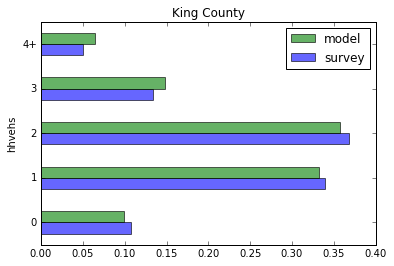

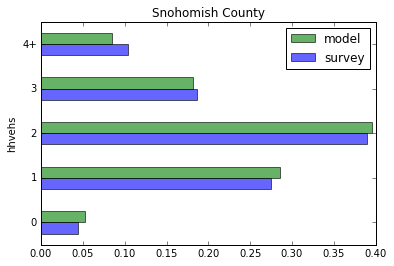

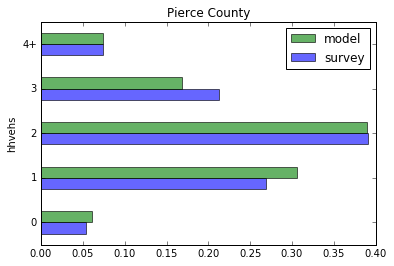

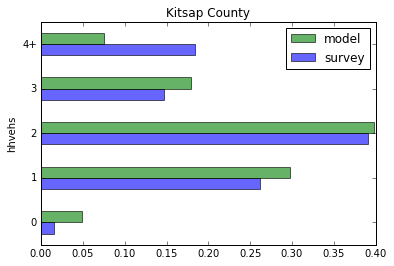

In [15]:
for county in df['geog_name'].unique():
    _df = pd.DataFrame([_df_survey[county],_df_model[county]]).T
    _df.columns = ['survey','model']
    _df.plot(kind='barh', title=county, legend='reverse', alpha=0.6)


## Total Workers by Home County


In [16]:
df = load_data('work_flows')
pd.options.display.float_format = '{:0,.0f}'.format

# Add geography lookup
df = df.merge(taz_geog[['taz','geog_name']], left_on='hhtaz', right_on='taz')
df.rename(columns={'geog_name':'hh_county'}, inplace=True)

df = df.merge(taz_geog[['taz','geog_name']], left_on='pwtaz', right_on='taz')
df.rename(columns={'geog_name':'work_county'}, inplace=True)

df_model = df[df['source'] == 'model'].groupby(['hh_county','work_county']).sum()[['psexpfac']].reset_index()
df_survey = df[df['source'] == 'survey'].groupby(['hh_county','work_county']).sum()[['psexpfac']].reset_index()

In [17]:
df_survey.merge(df_model, on=['hh_county','work_county'], suffixes=['_survey','_model'])

,hh_county,work_county,psexpfac_survey,psexpfac_model
0,King County,King County,"773,517","1,017,828"
1,King County,Kitsap County,447,"1,190"
2,King County,Pierce County,"22,889","33,153"
3,King County,Snohomish County,"14,240","40,729"
4,Kitsap County,King County,"21,051","6,441"
5,Kitsap County,Kitsap County,"50,380","99,801"
6,Kitsap County,Pierce County,"8,107","4,753"
7,Pierce County,King County,"65,933","85,568"
8,Pierce County,Kitsap County,"8,921","9,777"
9,Pierce County,Pierce County,"205,525","242,676"
